# 1.Problem statement 

Our client is an Insurance company that has provided Insurance to its customers now 
they need your help in building a model to predict whether the policyholders (customers) from
past year will also be interested in Vehicle Insurance provided by the company.

# 2.Data Gathering

In [73]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings


In [2]:
df=pd.read_csv(r'D:\Velocity Institute\data set\prj\train.csv')
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
row_no=df.shape[0]
col_no=df.shape[1]
print(f'Number of Rows are {row_no} and Number of Rows are {col_no}')

Number of Rows are 381109 and Number of Rows are 12


# 3.EDA

In [36]:
df.drop('id',axis=1,inplace=True)

In [41]:
for col in df.columns:
    print(f'Number of Null values for {col} is {df[col].isna().sum()}')

Number of Null values for Gender is 0
Number of Null values for Age is 0
Number of Null values for Driving_License is 0
Number of Null values for Region_Code is 0
Number of Null values for Previously_Insured is 0
Number of Null values for Vehicle_Age is 0
Number of Null values for Vehicle_Damage is 0
Number of Null values for Annual_Premium is 0
Number of Null values for Policy_Sales_Channel is 0
Number of Null values for Vintage is 0
Number of Null values for Response is 0


In [60]:
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes([int,float])
display(df_cat.columns)
display(df_num.columns)

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

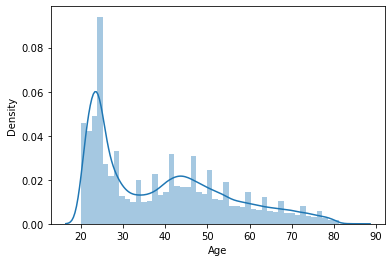

C:\Users\Merlin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


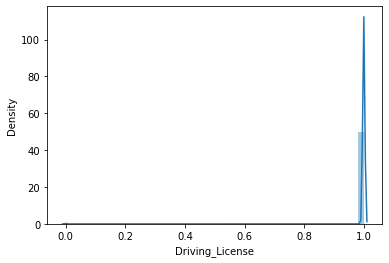

C:\Users\Merlin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


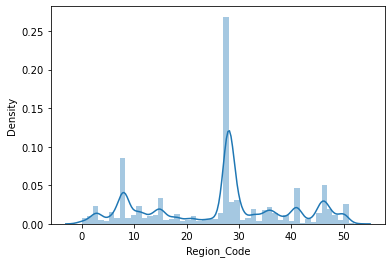

C:\Users\Merlin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


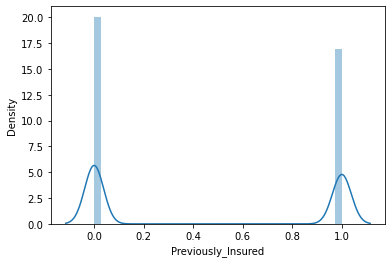

C:\Users\Merlin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


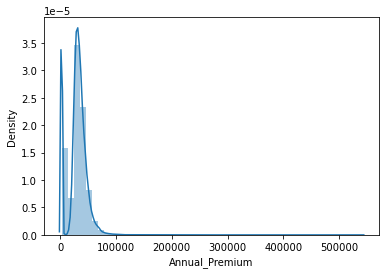

C:\Users\Merlin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


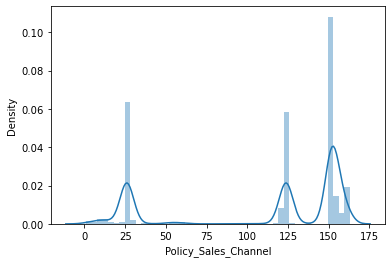

C:\Users\Merlin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


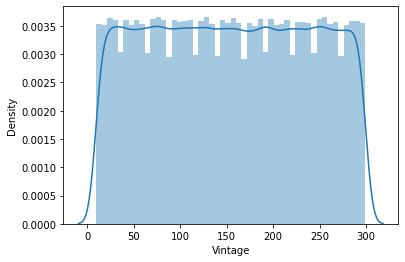

C:\Users\Merlin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


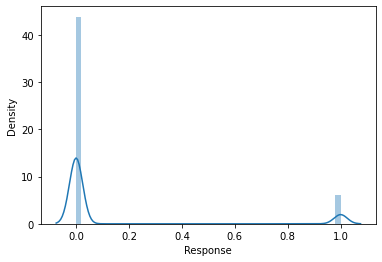

In [65]:
for col in df_num:
    plt.figure()
    sns.distplot(df[col])
    plt.show()

In [68]:
for col in df_cat:
    print(f'Values count for {col} is {df[col].value_counts()}')

Values count for Gender is Male      206089
Female    175020
Name: Gender, dtype: int64
Values count for Vehicle_Age is 1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64
Values count for Vehicle_Damage is Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64


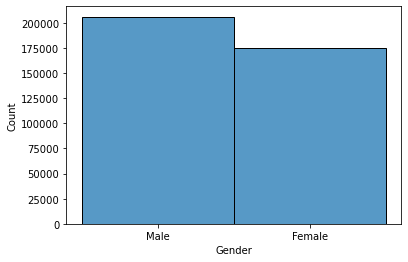

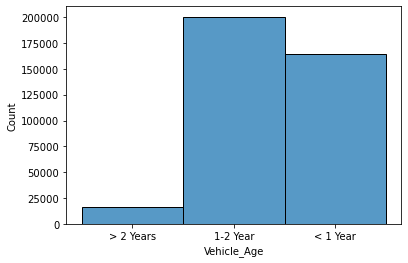

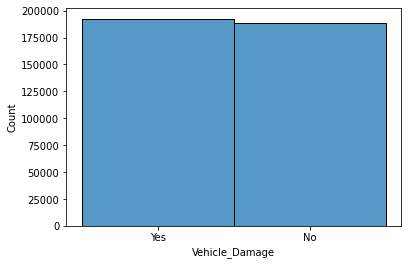

In [75]:
for col in df_cat:
    plt.figure()
    sns.histplot(df[col])
    plt.show()

C:\Users\Merlin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


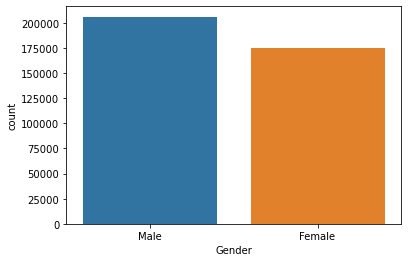

C:\Users\Merlin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


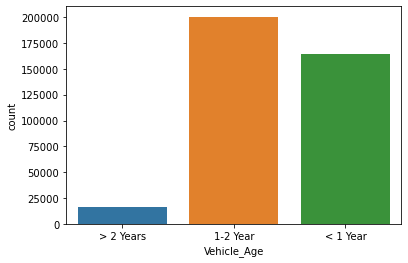

C:\Users\Merlin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


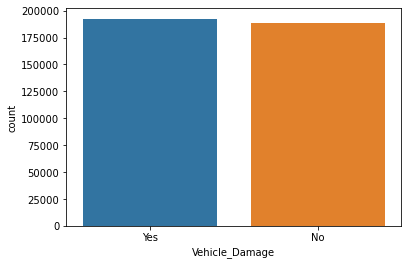

In [81]:
for col in df_cat:
    plt.figure()
    sns.countplot(df[col])
    plt.show()

In [32]:
#checking uniques values for all column
for col in df.columns:
    print(f'Number of Uniques value for {col} is {df[col].nunique()}')
    if df[col].nunique() == row_no:
        print('>> We can drop this column')
        print()

Number of Uniques value for id is 381109
>> We can drop this column

Number of Uniques value for Gender is 2
Number of Uniques value for Age is 66
Number of Uniques value for Driving_License is 2
Number of Uniques value for Region_Code is 53
Number of Uniques value for Previously_Insured is 2
Number of Uniques value for Vehicle_Age is 3
Number of Uniques value for Vehicle_Damage is 2
Number of Uniques value for Annual_Premium is 48838
Number of Uniques value for Policy_Sales_Channel is 155
Number of Uniques value for Vintage is 290
Number of Uniques value for Response is 2


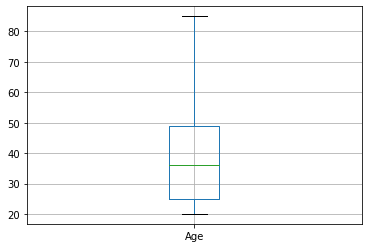

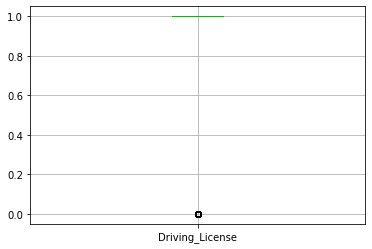

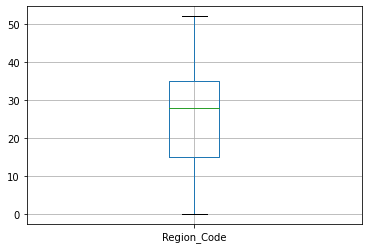

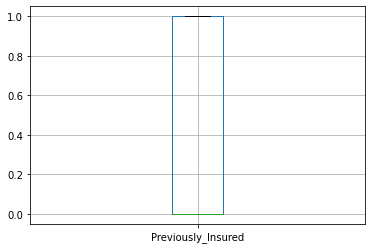

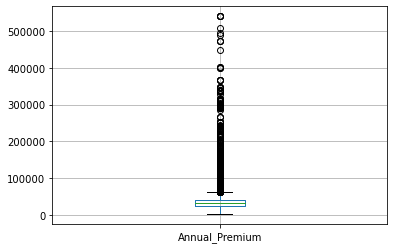

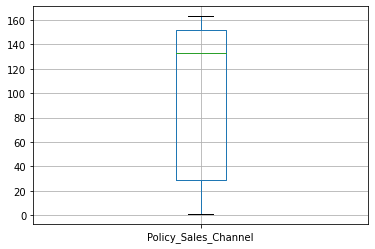

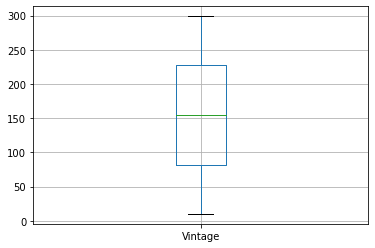

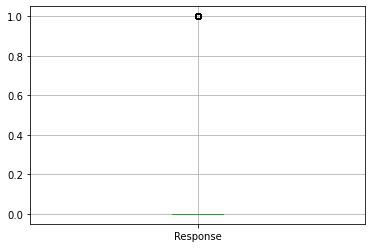

In [77]:
for col in df_num:
    plt.figure()
    df[[col]].boxplot()
    plt.show()

<AxesSubplot:>

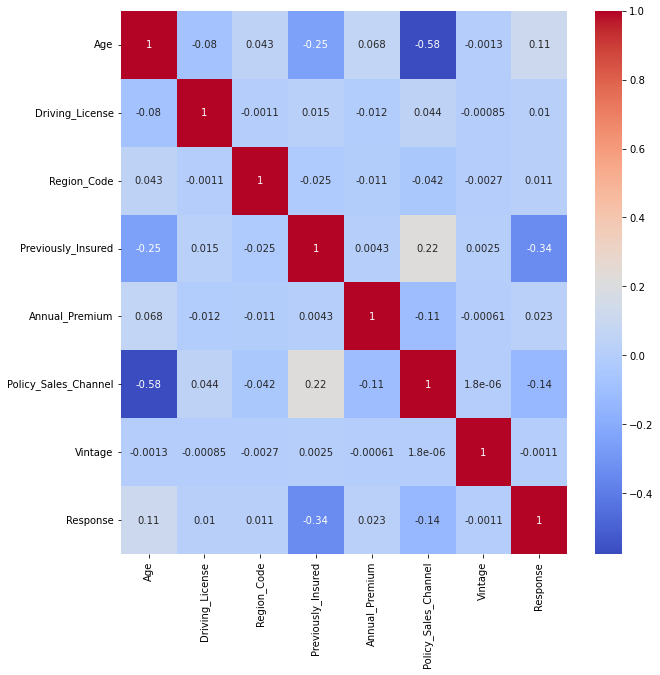

In [80]:
plt.figure(figsize=(10,10))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap='coolwarm')

# 4.Feature Engineering

In [82]:
#encoding>>onehot or getdummies
#scalling>> log,sqrt,cbrt,minmaxscalar
#outlier treate>>Iqr
df_cat

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No
...,...,...,...
381104,Male,1-2 Year,No
381105,Male,< 1 Year,No
381106,Male,< 1 Year,No
381107,Female,> 2 Years,Yes
